In [10]:
import json
import pandas as pd
import folium
from geoband.API import *
from shapely.geometry import Point, Polygon
from tqdm import tqdm
import json
import pandas as pd
import folium
from geoband.API import *
from shapely.geometry import Point, Polygon
from tqdm import tqdm

In [11]:
import geopandas as gpd
layer = gpd.read_file('32.수원시_표준격자(250M_x_250M).geojson')

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [12]:
singo = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson')

In [13]:
GetCompasData('SBJ_2109_001', '5', '5.수원시_성연령별_유동인구(2020).csv')

In [14]:
yudong = gpd.read_file('5.수원시_성연령별_유동인구(2020).csv')

In [15]:
yudong['gid'] = 0

In [16]:
yudong['lat'] = yudong['lat'].astype(float)
yudong['lon'] = yudong['lon'].astype(float)
yudong['geometry'] = yudong.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
yudong = gpd.GeoDataFrame(yudong, geometry='geometry')
yudong.head()

,STD_YM,MAN_FLOW_POP_CNT_10G,MAN_FLOW_POP_CNT_20G,MAN_FLOW_POP_CNT_30G,MAN_FLOW_POP_CNT_40G,MAN_FLOW_POP_CNT_50G,MAN_FLOW_POP_CNT_60GU,WMAN_FLOW_POP_CNT_10G,WMAN_FLOW_POP_CNT_20G,WMAN_FLOW_POP_CNT_30G,WMAN_FLOW_POP_CNT_40G,WMAN_FLOW_POP_CNT_50G,WMAN_FLOW_POP_CNT_60GU,lon,lat,geometry,gid
0,202001,0,0.02,0.04,0.04,0.04,0.02,0,0,0.04,0.04,0.04,0.02,126.929668,37.270151,POINT (126.92967 37.27015),0
1,202001,0.06,0.08,0.06,0.1,0.09,0.08,0.06,0.06,0.07,0.12,0.09,0.1,126.930229,37.270604,POINT (126.93023 37.27060),0
2,202001,0.09,0.12,0.1,0.23,0.18,0.15,0.11,0.09,0.09,0.25,0.23,0.13,126.930188,37.276012,POINT (126.93019 37.27601),0
3,202001,0.04,0.04,0.04,0.08,0.06,0.02,0.04,0.04,0.04,0.08,0.06,0.02,126.931363,37.269708,POINT (126.93136 37.26971),0
4,202001,0.04,0.06,0.09,0.12,0.14,0.15,0.02,0.04,0.07,0.14,0.14,0.09,126.931319,37.275567,POINT (126.93132 37.27557),0


In [17]:
for i,j in zip(  range(0,len(layer))  ,range(0,len(yudong))  ):
    if layer.iloc[i]['geometry'].contains(yudong.iloc[j]['geometry']) == True:
        yudong.iloc[j]['gid'] = layer.iloc[i]['gid']

In [18]:
pointInPoly = gpd.sjoin(yudong, layer, op='within') 

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [19]:
pointInPoly

,STD_YM,MAN_FLOW_POP_CNT_10G,MAN_FLOW_POP_CNT_20G,MAN_FLOW_POP_CNT_30G,MAN_FLOW_POP_CNT_40G,MAN_FLOW_POP_CNT_50G,MAN_FLOW_POP_CNT_60GU,WMAN_FLOW_POP_CNT_10G,WMAN_FLOW_POP_CNT_20G,WMAN_FLOW_POP_CNT_30G,WMAN_FLOW_POP_CNT_40G,WMAN_FLOW_POP_CNT_50G,WMAN_FLOW_POP_CNT_60GU,lon,lat,geometry,gid_left,index_right,gid_right
0,202001,0,0.02,0.04,0.04,0.04,0.02,0,0,0.04,0.04,0.04,0.02,126.929668,37.270151,POINT (126.92967 37.27015),0,6,다사49ab19aa
1,202001,0.06,0.08,0.06,0.1,0.09,0.08,0.06,0.06,0.07,0.12,0.09,0.1,126.930229,37.270604,POINT (126.93023 37.27060),0,6,다사49ab19aa
32304,202002,0,0,0.04,0.04,0.04,0.02,0,0,0.04,0.04,0.02,0,126.929668,37.270151,POINT (126.92967 37.27015),0,6,다사49ab19aa
32305,202002,0.04,0.04,0.04,0.08,0.08,0.04,0.04,0.04,0.06,0.08,0.08,0.04,126.930229,37.270604,POINT (126.93023 37.27060),0,6,다사49ab19aa
64914,202003,0,0.02,0.04,0.04,0.04,0.02,0,0.02,0.04,0.04,0.04,0.02,126.928537,37.270596,POINT (126.92854 37.27060),0,6,다사49ab19aa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395974,202012,0.19,0.21,0.26,0.34,0.46,0.71,0.18,0.19,0.19,0.28,0.39,0.42,127.006567,37.325481,POINT (127.00657 37.32548),0,1038,다사56ab25ab
396534,202012,0,0,0,0,0.02,0.02,0,0,0,0,0,0,127.008251,37.326840,POINT (127.00825 37.32684),0,1038,다사56ab25ab
398497,202012,0,0.02,0.05,0.11,0.21,0.25,0,0.02,0.02,0.05,0.14,0.12,127.014372,37.340386,POINT (127.01437 37.34039),0,1149,다사56bb26bb
400756,202012,0,0,0,0,0,0.02,0,0,0,0,0,0,127.020687,37.323736,POINT (127.02069 37.32374),0,1312,다사57ba25aa


In [20]:
with open('32.수원시_표준격자(250M_x_250M).geojson') as data_file:
    layer_2 = json.load(data_file)

In [21]:
pointInPoly.columns.tolist()[1:13]

['MAN_FLOW_POP_CNT_10G',
 'MAN_FLOW_POP_CNT_20G',
 'MAN_FLOW_POP_CNT_30G',
 'MAN_FLOW_POP_CNT_40G',
 'MAN_FLOW_POP_CNT_50G',
 'MAN_FLOW_POP_CNT_60GU',
 'WMAN_FLOW_POP_CNT_10G',
 'WMAN_FLOW_POP_CNT_20G',
 'WMAN_FLOW_POP_CNT_30G',
 'WMAN_FLOW_POP_CNT_40G',
 'WMAN_FLOW_POP_CNT_50G',
 'WMAN_FLOW_POP_CNT_60GU']

In [22]:
pointInPoly[pointInPoly.columns.tolist()[1:13]] = pointInPoly[pointInPoly.columns.tolist()[1:13]].astype(float)

In [23]:
pointInPoly['man_sum'] = pointInPoly['MAN_FLOW_POP_CNT_10G'] +  pointInPoly['MAN_FLOW_POP_CNT_20G'] +  pointInPoly['MAN_FLOW_POP_CNT_30G'] +  pointInPoly['MAN_FLOW_POP_CNT_40G'] +  pointInPoly['MAN_FLOW_POP_CNT_50G'] +  pointInPoly['MAN_FLOW_POP_CNT_60GU']
pointInPoly['wman_sum'] = pointInPoly['WMAN_FLOW_POP_CNT_10G'] +  pointInPoly['WMAN_FLOW_POP_CNT_20G'] +  pointInPoly['WMAN_FLOW_POP_CNT_30G'] +  pointInPoly['WMAN_FLOW_POP_CNT_40G'] +  pointInPoly['WMAN_FLOW_POP_CNT_50G'] +  pointInPoly['WMAN_FLOW_POP_CNT_60GU']
pointInPoly['sum'] = pointInPoly['man_sum'] + pointInPoly['wman_sum']

In [24]:
pointInPoly.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 416143 entries, 0 to 404006
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   STD_YM                  416143 non-null  object  
 1   MAN_FLOW_POP_CNT_10G    416143 non-null  float64 
 2   MAN_FLOW_POP_CNT_20G    416143 non-null  float64 
 3   MAN_FLOW_POP_CNT_30G    416143 non-null  float64 
 4   MAN_FLOW_POP_CNT_40G    416143 non-null  float64 
 5   MAN_FLOW_POP_CNT_50G    416143 non-null  float64 
 6   MAN_FLOW_POP_CNT_60GU   416143 non-null  float64 
 7   WMAN_FLOW_POP_CNT_10G   416143 non-null  float64 
 8   WMAN_FLOW_POP_CNT_20G   416143 non-null  float64 
 9   WMAN_FLOW_POP_CNT_30G   416143 non-null  float64 
 10  WMAN_FLOW_POP_CNT_40G   416143 non-null  float64 
 11  WMAN_FLOW_POP_CNT_50G   416143 non-null  float64 
 12  WMAN_FLOW_POP_CNT_60GU  416143 non-null  float64 
 13  lon                     416143 non-null  float64 
 

In [25]:
aa = pointInPoly.groupby('gid_right').sum()

In [26]:
aa['gid_name'] = aa.index.tolist()

In [27]:
layer_2

{'type': 'FeatureCollection',
 'name': '수원시_격자(250)',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'gid': '다사49aa19ab'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.92476861910082, 37.27076573094027],
       [126.92475147461319, 37.27301912088102],
       [126.92757119152385, 37.27303278916454],
       [126.92758825198494, 37.27077939811534],
       [126.92476861910082, 37.27076573094027]]]]}},
  {'type': 'Feature',
   'properties': {'gid': '다사49aa19ba'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.92475147461319, 37.27301912088102],
       [126.92473432821753, 37.27527250995515],
       [126.9275541291641, 37.275286179347205],
       [126.92757119152385, 37.27303278916454],
       [126.92475147461319, 37.27301912088102]]]]}},
  {'type': 'Feature',
   'properties': {'gid': '다사49aa20aa'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[

In [28]:
aa

,MAN_FLOW_POP_CNT_10G,MAN_FLOW_POP_CNT_20G,MAN_FLOW_POP_CNT_30G,MAN_FLOW_POP_CNT_40G,MAN_FLOW_POP_CNT_50G,MAN_FLOW_POP_CNT_60GU,WMAN_FLOW_POP_CNT_10G,WMAN_FLOW_POP_CNT_20G,WMAN_FLOW_POP_CNT_30G,WMAN_FLOW_POP_CNT_40G,WMAN_FLOW_POP_CNT_50G,WMAN_FLOW_POP_CNT_60GU,lon,lat,gid_left,index_right,man_sum,wman_sum,sum,gid_name
gid_right,,,,,,,,,,,,,,,,,,,,
다사49aa19ab,2.33,3.06,6.10,12.15,15.30,15.90,2.42,2.38,4.07,8.28,9.74,7.37,4315.531535,1267.249654,0,0,54.84,34.26,89.10,다사49aa19ab
다사49aa19ba,0.20,0.97,2.21,4.60,6.89,7.46,0.26,0.54,0.98,2.45,3.67,2.85,1269.273887,372.732946,0,10,22.33,10.75,33.08,다사49aa19ba
다사49aa20aa,0.00,0.00,0.00,0.04,0.08,0.02,0.00,0.00,0.00,0.01,0.01,0.00,380.782043,111.836108,0,6,0.14,0.02,0.16,다사49aa20aa
다사49ab18ab,0.48,0.74,1.39,1.86,2.05,1.85,0.52,0.82,1.26,1.52,1.63,1.45,1777.023957,521.688408,0,42,8.37,7.20,15.57,다사49ab18ab
다사49ab18ba,1.74,2.64,4.82,6.44,7.50,6.68,1.69,2.48,4.77,5.99,6.63,5.12,5204.122940,1527.881513,0,164,29.82,26.68,56.50,다사49ab18ba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사63ba20bb,5.41,11.35,26.30,50.27,46.82,27.75,7.12,8.47,19.54,38.43,32.18,15.22,1397.974716,410.153778,0,22924,167.90,120.96,288.86,다사63ba20bb
다사63ba21aa,1.51,4.03,10.73,30.84,30.50,15.18,2.80,2.55,4.70,13.18,11.65,5.89,3050.126512,894.906865,0,50040,92.79,40.77,133.56,다사63ba21aa
다사63ba21ba,1.14,1.88,4.66,7.06,6.24,4.18,1.04,1.54,3.37,4.63,3.45,2.61,2541.775952,745.875920,0,41740,25.16,16.64,41.80,다사63ba21ba


In [29]:
df_INNER_JOIN = pd.merge(singo, aa, left_on='gid', right_on='gid_right', how='inner')
df_INNER_JOIN['result'] = df_INNER_JOIN['rep_cnt'] / df_INNER_JOIN['sum']

In [30]:
map = folium.Map(location=[37.566345, 126.977893])
folium.Choropleth(
    geo_data=layer_2,
    data=df_INNER_JOIN,
    columns=('gid_name', 'result'),
    key_on='feature.properties.gid',
    fill_color='BuPu',
    legend_name='관할 별 count',
).add_to(map)
map


In [31]:
yudong.crs = {'init':'epsg:4326'}
yudong = yudong.to_crs({'init':'epsg:5179'})

/opt/app-root/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


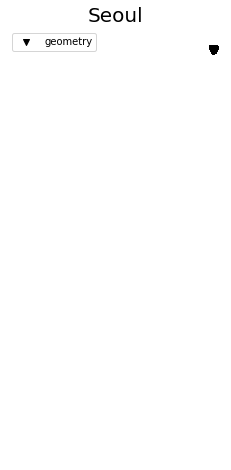

In [32]:
ax = layer.plot(column="gid", figsize=(8,8), alpha=0.8)
yudong.plot(ax=ax, marker='v', color='black', label='geometry')
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

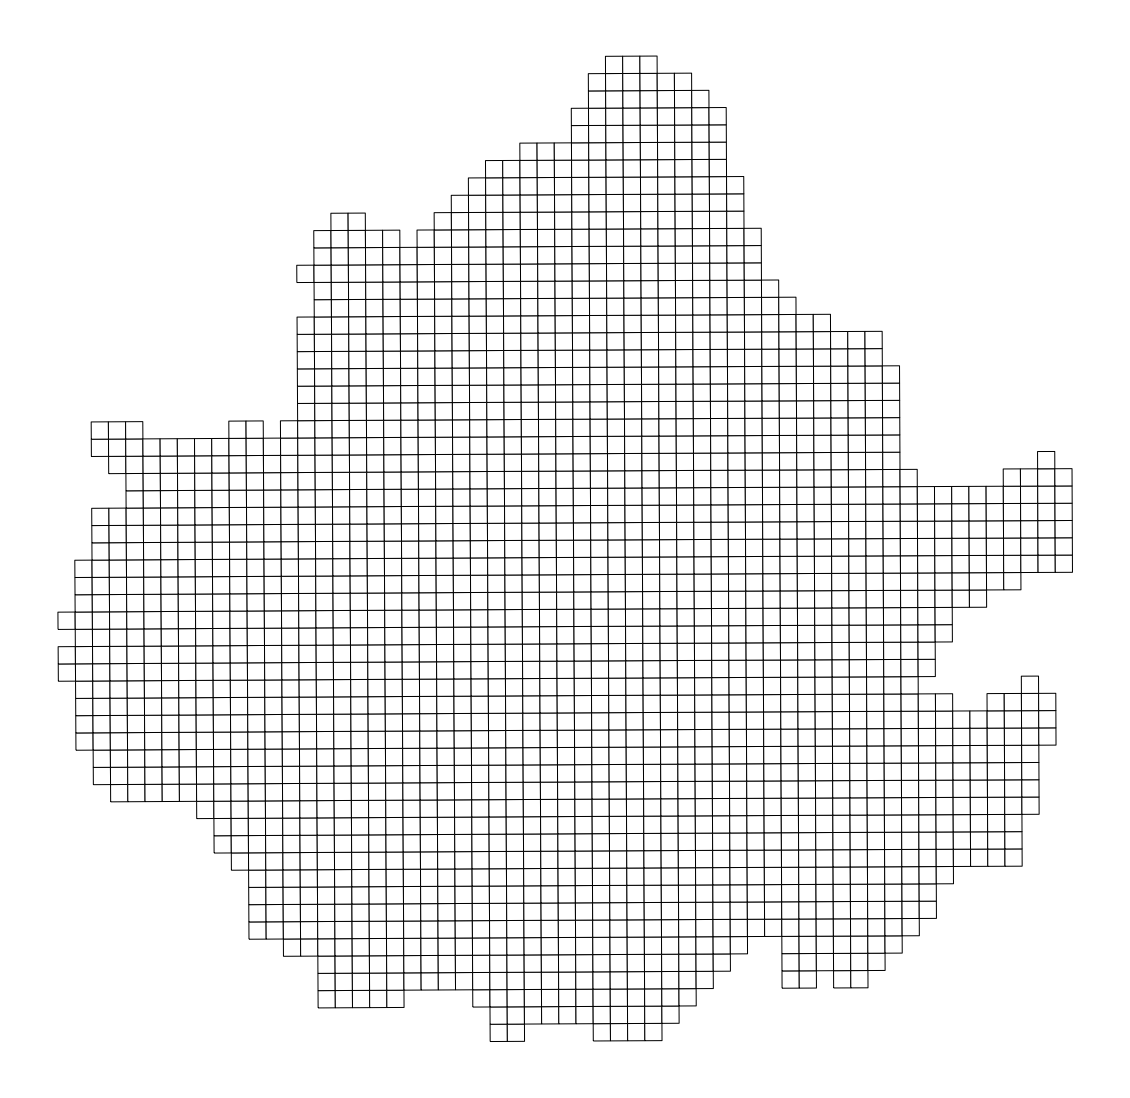

In [33]:
from shapely.geometry import Point, Polygon, LineString
from matplotlib import pyplot as plt
ax = layer.plot(figsize=(20, 20), color="w", edgecolor="k")
ax.set_axis_off()
plt.show()